<a href="https://colab.research.google.com/github/ibritics/Python_DataAnalytics_Tutorials/blob/main/Python_Files/Lecture10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 10: Classification Models 2

## Classification Models

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#### Classification Models ####
from sklearn.linear_model import LogisticRegression


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df= pd.read_csv('/content/drive/MyDrive/Preply/Mariia/Data/Titanic_Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Preply/Mariia/Data/Titanic_Test.csv')

In [ ]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Names are unique across the dataset (count=unique=891) <br>
Sex variable as two possible values with 65% male (top=male, freq=577/count=891).<br>
Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.<br>
Embarked takes three possible values. S port used by most passengers (top=S)<br>
Ticket feature has high ratio (22%) of duplicate values (unique=681).<br>

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.<br>
Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).<br>
SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).<br>

## Visual Analysis

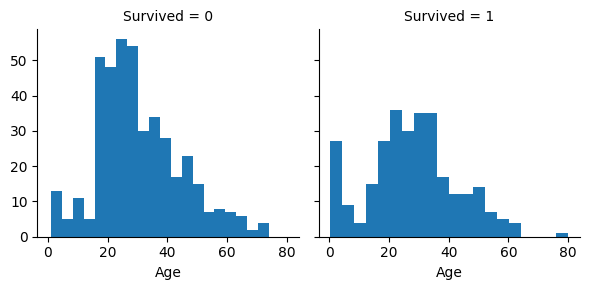

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Infants (Age <=4) had high survival rate.<br>
Oldest passengers (Age = 80) survived.<br>
Large number of 15-25 year olds did not survive.<br>
Most passengers are in 15-35 age range.<br>


## Data Preproccessing

In [ ]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
for dataset in combine:
  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0] #mean, median, mode...
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


## Modeling and Prediction

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = model.fit()

# Print the summary of the model
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.13
Date:                Sun, 26 Nov 2023   Deviance:                       786.26
Time:                        18:26:46   Pearson chi2:                     910.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3620
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1891      0.479      4.565      0.0

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
X_test = sm.add_constant(X_test)
predicted_probabilities_Train = result.predict(X_test)

In [ ]:
predicted_probabilities_Train

0      0.115305
1      0.347011
2      0.119525
3      0.097422
4      0.569975
         ...   
413    0.097302
414    0.938710
415    0.063951
416    0.097302
417    0.085734
Length: 418, dtype: float64

In [ ]:
predicted_labels = (predicted_probabilities_Train > 0.7).astype(int) #True /1

In [ ]:
conf_matrix = confusion_matrix(Y_train, predicted_labels)

ValueError: ignored

In [ ]:
conf_matrix

array([[530,  19],
       [154, 188]])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_test, predicted_labels)

NameError: ignored

In [ ]:
accuracy

0.8058361391694725

In [ ]:
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':predicted_labels })

In [ ]:
submission.to_csv('/content/drive/MyDrive/Preply/Mariia/Data/submission_logistic.csv', index=False)

RMSE: 0.10911506778263545


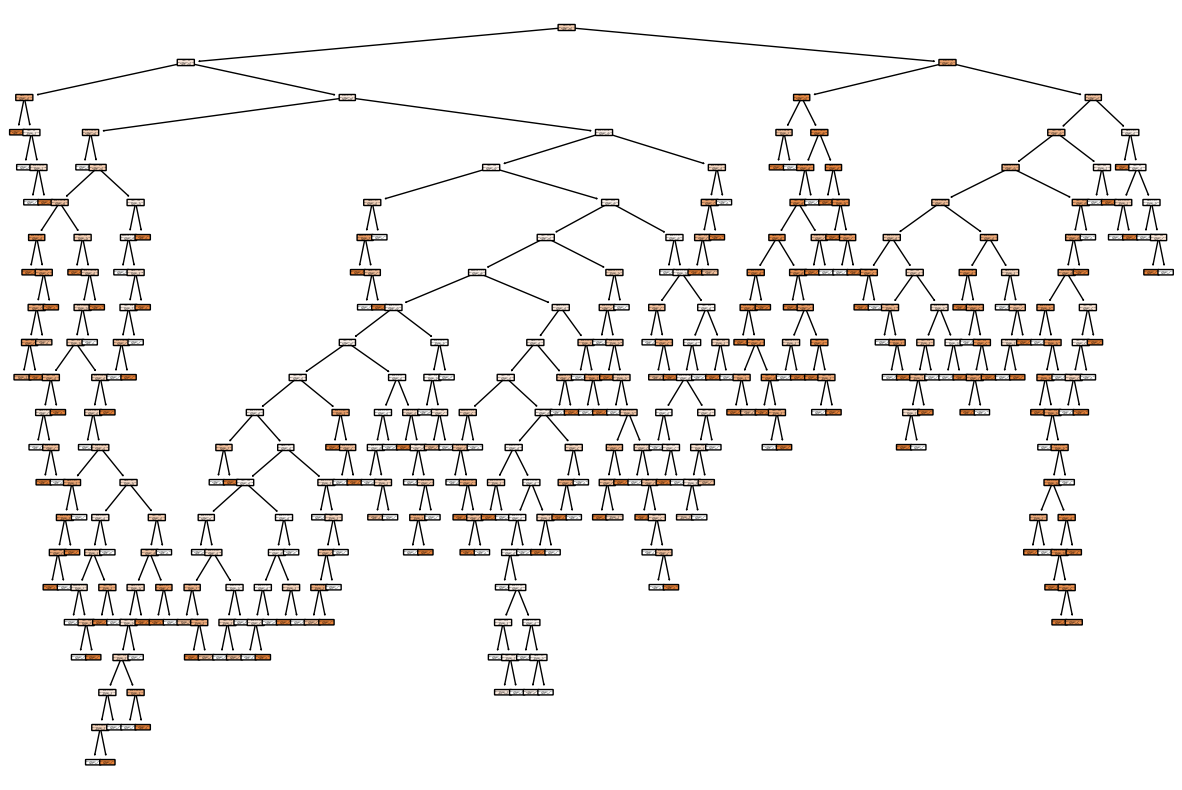


Feature Importance:
Sex: 0.31088094531466326
Fare: 0.24204592751770446
Age: 0.23993755538275358
Pclass: 0.1140237203908187
SibSp: 0.04434865782136608
Parch: 0.027476414772316545
Embarked: 0.021286778800377475


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming you have X_train, Y_train, and X_test defined

# Create a Decision Tree regressor
tree_regressor = DecisionTreeRegressor()

# Train the regressor
tree_regressor.fit(X_train, Y_train)

# Predict on the test set
Y_pred_tree = tree_regressor.predict(X_test)

# Calculate the RMSE on the training set
rmse_tree = np.sqrt(mean_squared_error(Y_train, tree_regressor.predict(X_train)))

# Display the RMSE
print("RMSE:", rmse_tree)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_regressor, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

# Display feature importance
feature_importance = tree_regressor.feature_importances_
features = X_train.columns
feature_importance_dict = dict(zip(features, feature_importance))

print("\nFeature Importance:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")


## KNN

Given a dataset with labeled points, when tasked with predicting the label of a new data point, KNN identifies the 'k' nearest neighbors based on a specified distance metric (commonly Euclidean or Manhattan distance).
The predicted label for the new point is determined by a majority vote or averaging of labels among its nearest neighbors. For classification, the majority class is assigned; for regression, the average value is computed.
Parameter Selection:

The selection of the parameter 'k' is pivotal. A small 'k' may lead to sensitivity to noise in the data, while a large 'k' may oversmooth patterns. Common choices for 'k' include 3, 5, or 7, and the optimal value is contingent upon the specific characteristics of the dataset.
Distance Metrics:

The algorithm relies on distance measures to quantify the dissimilarity between data points. Euclidean distance, representing the straight-line distance between points, and Manhattan distance, accounting for the sum of horizontal and vertical distances, are frequently employed metrics.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.98

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.98

In [ ]:
test_df['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have X_train, Y_train, and X_test defined

# Create an XGBoost regressor
xgb_regressor = XGBRegressor()

# Train the regressor
xgb_regressor.fit(X_train, Y_train)

# Predict on the test set
Y_pred_xgb = xgb_regressor.predict(X_test)

# Calculate the RMSE on the training set
rmse_xgb = round(np.sqrt(mean_squared_error(Y_train, xgb_regressor.predict(X_train))),2)

# Display the RMSE
rmse_xgb


0.13

In [ ]:
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':Y_pred_xgb })

In [ ]:
submission.to_csv('/content/drive/MyDrive/Preply/Mariia/Data/submission.csv', index=False)

In [ ]:
df_y